## Setup

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [47]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


## Visualize data

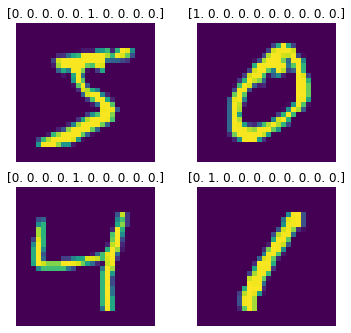

In [48]:
def showImg(X,y,n_row=4, n_col=4):
    plt.figure(figsize=(2.5*n_row,2.5*n_col))
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28,28))
        plt.title('{}'.format(y[i]))
        plt.axis('off')
        
showImg(x_train,y_train,2,2)

## Build the model

In [49]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
     
    #  TODO: 
    # - Add dense layer 512 (with relu) --> 64 (with relu) --> 10 (with softmax)
    # - Add dropout after each dense layer

        layers.Dense(512, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 435,402
Trainable params: 435,402
Non-tr

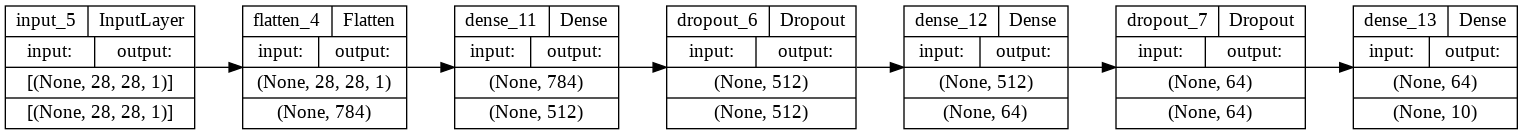

In [50]:
tf.keras.utils.plot_model(model, show_shapes=True,rankdir='LR')

## Train the model

In [51]:
batch_size = 128
epochs = 3

# TODO: 
# compile model with these parameter 
# loss function: categorical_crossentropy
# optimizer: Adam
# metrics: accurary

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 4s 9ms/step - loss: 0.3817 - accuracy: 0.8837 - val_loss: 0.1209 - val_accuracy: 0.9645
Epoch 2/3
422/422 [==============================] - 4s 9ms/step - loss: 0.1694 - accuracy: 0.9491 - val_loss: 0.0896 - val_accuracy: 0.9738
Epoch 3/3
422/422 [==============================] - 4s 9ms/step - loss: 0.1244 - accuracy: 0.9616 - val_loss: 0.0782 - val_accuracy: 0.9763


## Evaluate the trained model

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0848817527294159
Test accuracy: 0.9733999967575073
